In [ ]:
import SimpleITK as sitk
import numpy as np
import os

# 预处理

## 重采样

In [ ]:
def resample_nifti_sitk(ct_path, mask_path, target_spacing=(1, 1, 1), output_dir="./"):
    # 读取 NIfTI
    def load_nifti_sitk(file_path):
        image = sitk.ReadImage(file_path)
        return image
    ct_image = load_nifti_sitk(ct_path)
    mask_image = load_nifti_sitk(mask_path)

    # 在加载时将 Mask 的空间信息对齐到 CT
    mask_image.SetSpacing(ct_image.GetSpacing())
    mask_image.SetOrigin(ct_image.GetOrigin())
    mask_image.SetDirection(ct_image.GetDirection())

    # 重采样函数
    def resample_image_sitk(image, target_spacing, reference_image=None, is_mask=False):
        resampler = sitk.ResampleImageFilter()
        
        if reference_image is not None:
            resampler.SetReferenceImage(reference_image)
        else:
            original_size = np.array(image.GetSize(), dtype=np.int32)
            original_spacing = np.array(image.GetSpacing())
            new_size = np.round(original_size * (original_spacing / np.array(target_spacing))).astype(int)
            resampler.SetSize([int(i) for i in new_size])
            resampler.SetOutputSpacing(target_spacing)
            resampler.SetOutputDirection(image.GetDirection())
            resampler.SetOutputOrigin(image.GetOrigin())
        
        resampler.SetTransform(sitk.Transform())
        
        if is_mask:
            image = sitk.Cast(image, sitk.sitkUInt8)
            resampler.SetInterpolator(sitk.sitkNearestNeighbor)
            resampler.SetOutputPixelType(sitk.sitkUInt8)
        else:
            resampler.SetInterpolator(sitk.sitkBSpline)
        
        return resampler.Execute(image)

    # 重采样 CT
    resampled_ct = resample_image_sitk(ct_image, target_spacing, is_mask=False)
    # 调整 Mask 的尺寸以匹配 CT
    aligned_mask = resample_image_sitk(mask_image, target_spacing, reference_image=resampled_ct, is_mask=True)
    # 检查调整后的 Mask 数据
    mask_data = sitk.GetArrayFromImage(aligned_mask)
    # print(f"调整尺寸后 Mask 的唯一值: {np.unique(mask_data)}")
    if np.max(mask_data) == 0:
        print("⚠️ 警告：调整尺寸后 Mask 仍然是全 0，请检查原始 Mask 数据！")

    # 保存结果
    def save_nifti_sitk(image, output_path, is_mask=False):
        if is_mask:
            image = sitk.Cast(image, sitk.sitkUInt8)
        sitk.WriteImage(image, output_path)
        # print(f"✅ 结果已保存至 {output_path}")
    save_nifti_sitk(resampled_ct, os.path.join(output_dir, "resampled_ct_1_1_1.nii.gz"))
    save_nifti_sitk(aligned_mask, os.path.join(output_dir, "resampled_mask_1_1_1.nii.gz"), is_mask=True)
    print("🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！")

if __name__ == "__main__":
    root_path = r'G:\original_data' # 更改文件路径
    print("Start")
    for Patient_ID in os.listdir(root_path):
        print(f'处理文件夹 {Patient_ID} 开始')
        img_CT_path = os.path.join(root_path, Patient_ID, 'ct_scan.nii')
        mask_CT_path = os.path.join(root_path, Patient_ID, 'ct_mask.nii')
        output_dir = os.path.join(root_path, Patient_ID)
        resample_nifti_sitk(img_CT_path, mask_CT_path, output_dir=output_dir)
        print(f'处理文件夹 {Patient_ID} 完成')
    print("End")
    

Start
处理文件夹 TCGA-BA-4077 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-BA-4077 完成
处理文件夹 TCGA-BB-7862 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-BB-7862 完成
处理文件夹 TCGA-BB-7863 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-BB-7863 完成
处理文件夹 TCGA-BB-7870 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-BB-7870 完成
处理文件夹 TCGA-BB-7871 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-BB-7871 完成
处理文件夹 TCGA-BB-7872 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-BB-7872 完成
处理文件夹 TCGA-CN-4733 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CN-4733 完成
处理文件夹 TCGA-CN-4735 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CN-4735 完成
处理文件夹 TCGA-CN-4742 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CN-4742 完成
处理文件夹 TCGA-CN-5370 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CN-5370 完成
处理文件夹 TCGA-CN-A49A 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CN-A49A 完成
处理文件夹 TCGA-CR-5247 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CR-5247 完成
处理文件夹 TCGA-CR-6470 开始
🚀 CT 重采样完成，Mask 空间信息已对齐，尺寸已调整！
处理文件夹 TCGA-CR-6470 完成
处理文件夹 TCGA-CR-6478 

## 灰度离散化

In [ ]:

def gray_discretization(input_path, output_path, bin_width=25):
    """将原始图像进行灰度离散化并保存"""
    if not os.path.exists(input_path):
        print(f"❌ 找不到图像文件：{input_path}")
        return
    try:
        img = sitk.ReadImage(input_path)
        img_array = sitk.GetArrayFromImage(img)

        # 灰度离散化
        discrete_array = np.floor(img_array / bin_width)

        out_img = sitk.GetImageFromArray(discrete_array.astype(np.int16))
        out_img.CopyInformation(img)

        sitk.WriteImage(out_img, output_path)
        print(f"✅ 已保存离散化图像：{output_path}")
    except Exception as e:
        print(f"❌ 图像处理失败：{input_path}, 错误：{e}")

# ========= 主程序入口 =========
if __name__ == "__main__":
    root_path = r'G:\original_data'  # 替换为你真实路径
    print("🚀 批量离散化开始")

    for Patient_ID in os.listdir(root_path):
        patient_folder = os.path.join(root_path, Patient_ID)
        if not os.path.isdir(patient_folder):
            continue

        print(f"▶️ 处理 {Patient_ID}")
        img_CT_path = os.path.join(patient_folder, 'resampled_ct_1_1_1.nii.gz')
        output_path = os.path.join(patient_folder, 'ct_scan_discrete.nii')

        gray_discretization(img_CT_path, output_path, bin_width=25)

    print("✅ 所有患者处理完成")


🚀 批量离散化开始
▶️ 处理 TCGA-BA-4077
✅ 已保存离散化图像：G:\original_data\TCGA-BA-4077\ct_scan_discrete.nii
▶️ 处理 TCGA-BB-7862
✅ 已保存离散化图像：G:\original_data\TCGA-BB-7862\ct_scan_discrete.nii
▶️ 处理 TCGA-BB-7863
✅ 已保存离散化图像：G:\original_data\TCGA-BB-7863\ct_scan_discrete.nii
▶️ 处理 TCGA-BB-7870
✅ 已保存离散化图像：G:\original_data\TCGA-BB-7870\ct_scan_discrete.nii
▶️ 处理 TCGA-BB-7871
✅ 已保存离散化图像：G:\original_data\TCGA-BB-7871\ct_scan_discrete.nii
▶️ 处理 TCGA-BB-7872
✅ 已保存离散化图像：G:\original_data\TCGA-BB-7872\ct_scan_discrete.nii
▶️ 处理 TCGA-CN-4733
✅ 已保存离散化图像：G:\original_data\TCGA-CN-4733\ct_scan_discrete.nii
▶️ 处理 TCGA-CN-4735
✅ 已保存离散化图像：G:\original_data\TCGA-CN-4735\ct_scan_discrete.nii
▶️ 处理 TCGA-CN-4742
✅ 已保存离散化图像：G:\original_data\TCGA-CN-4742\ct_scan_discrete.nii
▶️ 处理 TCGA-CN-5370
✅ 已保存离散化图像：G:\original_data\TCGA-CN-5370\ct_scan_discrete.nii
▶️ 处理 TCGA-CN-A49A
✅ 已保存离散化图像：G:\original_data\TCGA-CN-A49A\ct_scan_discrete.nii
▶️ 处理 TCGA-CR-5247
✅ 已保存离散化图像：G:\original_data\TCGA-CR-5247\ct_scan_discrete.nii
▶️ 处理 TCGA-CR-6470

## 图像裁剪

In [ ]:
import os
import SimpleITK as sitk
import numpy as np
import concurrent.futures

In [ ]:
def boundingbox_voxel(np_vol:np.ndarray):
    np_vol[np_vol > 0] = 1
    coords = np.argwhere(np_vol > 0)
    max_corner, min_corner = coords.max(axis=0), coords.min(axis=0)
    return max_corner, min_corner


def padding_box(max_corner, min_corner, padding_sz, img_size):
    new_max_corner, new_min_corner = max_corner + padding_sz, min_corner-padding_sz

    for i in range(3):
        if new_max_corner[i] >= img_size[i]:
            new_max_corner[i] = img_size[i] - 1
        if new_min_corner[i] < 0:
            new_min_corner[i] = 0

    return new_max_corner, new_min_corner


def crop_vol(vol, max_corner, min_corner):
    np_vol = sitk.GetArrayFromImage(vol)
    np_vol_crop = np_vol[min_corner[0]:max_corner[0]+1, min_corner[1]:max_corner[1]+1,
                  min_corner[2]:max_corner[2]+1]
    crop_vol = sitk.GetImageFromArray(np_vol_crop)
    ori_origin, ori_spacing, ori_axis = vol.GetOrigin(), vol.GetSpacing(), vol.GetDirection()
    new_origin = np.array(ori_origin)
    for i in range(3):
        axis = np.array([ori_axis[3*i], ori_axis[3*i+1], ori_axis[3*i+2]])
        new_origin += axis * (min_corner[2-i]*ori_spacing[i])
    crop_vol.SetDirection(ori_axis)
    crop_vol.SetSpacing(ori_spacing)
    crop_vol.SetOrigin(new_origin)

    return crop_vol

def crop_volumes(img_path, mask_path, dst_img_path, dst_mask_path, padding_size=5):
    img = sitk.ReadImage(img_path)
    msk = sitk.ReadImage(mask_path)

    # **确保 Mask 是二值的**
    msk = sitk.Cast(msk, sitk.sitkInt16)
    np_msk = sitk.GetArrayFromImage(msk)

    # **如果 mask 不是 0/1，强制二值化**
    np_msk[np_msk > 0] = 1
    np_msk[np_msk < 0] = 0

    # **打印 mask 统计信息**
    print(f"🔍 Mask shape: {np_msk.shape}")
    print(f"🔍 Mask 最小值: {np_msk.min()}, 最大值: {np_msk.max()}")
    print(f"🔍 Mask 非零元素数量: {np.count_nonzero(np_msk)}")

    if np.count_nonzero(np_msk) == 0:
        print(f"⚠️ 警告：{mask_path} 处理后 mask 为空，跳过！")
        return 0

    img_size = np_msk.shape
    max_corner, min_corner = boundingbox_voxel(np_msk.copy())
    max_corner, min_corner = padding_box(max_corner, min_corner, padding_size, img_size)

    crop_img = crop_vol(img, max_corner, min_corner)
    sitk.WriteImage(crop_img, dst_img_path)
    crop_msk = crop_vol(msk, max_corner, min_corner)
    sitk.WriteImage(crop_msk, dst_mask_path)


def main():
    root_path = r"G:\original_data"
    for patient in os.listdir(root_path):
        print("正在处理{}".format(patient))
        input_ct_path = os.path.join(root_path,patient,"ct_scan_discrete.nii")
        input_mask_path = os.path.join(root_path,patient,"resampled_mask_1_1_1.nii.gz")
        output_ct_path = os.path.join(root_path,patient,"img_crop.nii.gz")
        output_mask_path= os.path.join(root_path,patient,"mask_crop.nii.gz")
        x = crop_volumes(input_ct_path, input_mask_path, output_ct_path, output_mask_path, padding_size=25)
        if x == 0 :
            os.rename(os.path.join(root_path,patient), os.path.join(root_path,'bad_'+patient))
    print("所有用户处理完毕")
        
main()

正在处理TCGA-BA-4077
🔍 Mask shape: (282, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 30227
正在处理TCGA-BB-7862
🔍 Mask shape: (421, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 41758
正在处理TCGA-BB-7863
🔍 Mask shape: (421, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 70033
正在处理TCGA-BB-7870
🔍 Mask shape: (421, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 95461
正在处理TCGA-BB-7871
🔍 Mask shape: (389, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 82543
正在处理TCGA-BB-7872
🔍 Mask shape: (389, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 56842
正在处理TCGA-CN-4733
🔍 Mask shape: (729, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 17280
正在处理TCGA-CN-4735
🔍 Mask shape: (873, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 96436
正在处理TCGA-CN-4742
🔍 Mask shape: (729, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 92484
正在处理TCGA-CN-5370
🔍 Mask shape: (729, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 46272
正在处理TCGA-CN-A49A
🔍 Mask shape: (729, 500, 500)
🔍 Mask 最小值: 0, 最大值: 1
🔍 Mask 非零元素数量: 189877
正在处理TCGA-

# 影像组学特征提取

In [17]:
import pandas as pd
import os
import numpy as np
from radiomics import featureextractor
import SimpleITK as sitk 
import SimpleITK as sitk


In [18]:
#影像组学预设
para_path = r'A:\1\01_Project\HNC\4.liuzhoushanqushiyan\1.1.1\2.2 feature extraction\2.3.1 radiomics_feature\CtSeetings.yaml'
extractor = featureextractor.RadiomicsFeatureExtractor(para_path)
print("影像组学提取器加载完毕")

影像组学提取器加载完毕


In [33]:
# 自定义：mask 重采样函数
def resample_to_reference(mask_image, ref_image):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(ref_image)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetOutputSpacing(ref_image.GetSpacing())
    resampler.SetOutputOrigin(ref_image.GetOrigin())
    resampler.SetOutputDirection(ref_image.GetDirection())
    resampler.SetSize(ref_image.GetSize())
    return resampler.Execute(mask_image)

# 提取函数主体
def Radiomics_Feature_Extract(root_path):
    print("开始提取影像组学特征")
    df = pd.DataFrame()

    for Patient_ID in os.listdir(root_path):
        try:
            print(f'{Patient_ID} 开始提取影像组学特征')

            # 构造路径
            ct_path = os.path.join(root_path, Patient_ID, "img_crop.nii.gz")
            mask_path = os.path.join(root_path, Patient_ID, "mask_crop.nii.gz")

            # 读取 CT 和 mask
            ct_image = sitk.ReadImage(ct_path)
            mask_image = sitk.ReadImage(mask_path)

            # 重采样 mask 至 CT 空间
            mask_image = resample_to_reference(mask_image, ct_image)

            # 检查 mask 是否有值
            mask_array = sitk.GetArrayFromImage(mask_image)
            print(f"{Patient_ID} 的 mask 标签值: {np.unique(mask_array)}")

            if np.sum(mask_array == 1) == 0:
                print(f"{Patient_ID} 的 mask 中没有 label==1 的区域，跳过")
                continue

            # 提取特征
            features = extractor.execute(ct_image, mask_image)

            # 组织结果
            features_dict = {'name': Patient_ID}
            features_dict.update(features)
            df = pd.concat([df, pd.DataFrame([features_dict])], ignore_index=True)

            print(f'{Patient_ID} 完成')

        except Exception as e:
            print(f"Error processing {Patient_ID}: {e}")
            continue

    return df
# 输入数据
root_path = r"G:\original_data"
Radiomics_features=Radiomics_Feature_Extract(root_path)


开始提取影像组学特征
TCGA-BA-4077 开始提取影像组学特征
TCGA-BA-4077 的 mask 标签值: [0 1]
TCGA-BA-4077 完成
TCGA-BB-7862 开始提取影像组学特征
TCGA-BB-7862 的 mask 标签值: [0 1]
TCGA-BB-7862 完成
TCGA-BB-7863 开始提取影像组学特征
TCGA-BB-7863 的 mask 标签值: [0 1]
TCGA-BB-7863 完成
TCGA-BB-7870 开始提取影像组学特征
TCGA-BB-7870 的 mask 标签值: [0 1]
TCGA-BB-7870 完成
TCGA-BB-7871 开始提取影像组学特征
TCGA-BB-7871 的 mask 标签值: [0 1]
TCGA-BB-7871 完成
TCGA-BB-7872 开始提取影像组学特征
TCGA-BB-7872 的 mask 标签值: [0 1]
TCGA-BB-7872 完成
TCGA-CN-4733 开始提取影像组学特征
TCGA-CN-4733 的 mask 标签值: [0 1]
TCGA-CN-4733 完成
TCGA-CN-4735 开始提取影像组学特征
TCGA-CN-4735 的 mask 标签值: [0 1]
TCGA-CN-4735 完成
TCGA-CN-4742 开始提取影像组学特征
TCGA-CN-4742 的 mask 标签值: [0 1]
TCGA-CN-4742 完成
TCGA-CN-5370 开始提取影像组学特征
TCGA-CN-5370 的 mask 标签值: [0 1]
TCGA-CN-5370 完成
TCGA-CN-A49A 开始提取影像组学特征
TCGA-CN-A49A 的 mask 标签值: [0 1]
TCGA-CN-A49A 完成
TCGA-CR-5247 开始提取影像组学特征
TCGA-CR-5247 的 mask 标签值: [0 1]
TCGA-CR-5247 完成
TCGA-CR-6470 开始提取影像组学特征
TCGA-CR-6470 的 mask 标签值: [0 1]
TCGA-CR-6470 完成
TCGA-CR-6478 开始提取影像组学特征
TCGA-CR-6478 的 mask 标签值: [0 1]
TCGA-CR-647

In [ ]:
Radiomics_features_new = pd.concat([
    Radiomics_features.iloc[:, :1],   # 保留第1列（索引0）
    Radiomics_features.iloc[:, 35:]   # 保留第11列之后（索引10开始）
], axis=1)
Radiomics_features_new
Radiomics_features_new.to_csv(r'G:\original_data\Radiomics_features.csv', index=False)


# 特征筛选

## 单因素筛选

In [50]:
import pandas as pd
from lifelines import CoxPHFitter
import warnings
warnings.filterwarnings("ignore")

In [96]:
# ===== 1. 读取特征表 =====
file_path = r'G:\original_data\Radiomics_features_clinical.csv'  # 修改为你的文件路径
Radiomics_features_new = pd.read_csv(file_path)

# ===== 2. 设置生存信息列名 =====
time_column = 'time'      # 替换为你的生存时间列名字
status_column = 'status'  # 替换为你的生存状态列名字（1=事件发生，0=删失）

# ===== 3. 分离生存数据与特征列 =====
survival_data = Radiomics_features_new[[time_column, status_column]]
features_data = Radiomics_features_new.drop(columns=[time_column, status_column])
# 保存 `name` 列以便后续保存
name_column = Radiomics_features_new['name']  # 假设 'name' 列是病例名称
# 去除非数值型的列（例如样本ID列）
features_data = Radiomics_features_new.drop(columns=[time_column, status_column, 'name'])  # 假设 'name' 列是非数值列

# ===== 4. 单因素 Cox 回归筛选 =====
result_list = []

for feature in features_data.columns:
    if not pd.api.types.is_numeric_dtype(features_data[feature]):
        continue
    df = pd.concat([survival_data, features_data[[feature]]], axis=1)
    cph = CoxPHFitter()
    try:
        cph.fit(df, duration_col=time_column, event_col=status_column)
        summary = cph.summary
        p_value = summary.loc[feature, 'p']
        HR = summary.loc[feature, 'exp(coef)']  # HR（风险比）
        result_list.append([feature, p_value, HR])
    except Exception as e:
        print(f"特征 {feature} 拟合失败：{e}")

# ===== 5. 整理结果成表格 =====
result_df = pd.DataFrame(result_list, columns=['Feature', 'p_value', 'HR'])

# ===== 6. 按 p 值筛选显著特征 =====
significant_features = result_df[result_df['p_value'] < 0.05].sort_values(by='p_value')

# ===== 7. 输出筛选结果 =====
print("单因素筛选出的显著特征：")
significant_features

单因素筛选出的显著特征：


,Feature,p_value,HR
448,wavelet-LLH_glszm_SmallAreaHighGrayLevelEmphasis,0.000505,5.490429e+01
986,wavelet-HHH_glszm_HighGrayLevelZoneEmphasis,0.002841,5.001475e-02
990,wavelet-HHH_glszm_LowGrayLevelZoneEmphasis,0.002841,1.598114e+05
472,wavelet-LHL_firstorder_10Percentile,0.004699,2.203257e+15
762,wavelet-HLH_firstorder_Variance,0.004744,0.000000e+00
...,...,...,...
854,wavelet-HHL_glcm_Autocorrelation,0.043594,2.336254e-21
212,log-sigma-3-0-mm-3D_firstorder_RootMeanSquared,0.043716,9.401124e-04
1022,wavelet-LLL_firstorder_InterquartileRange,0.045540,8.366108e-03
489,wavelet-LHL_firstorder_Variance,0.045917,3.489602e-15


## Lasso筛选

In [80]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import ElasticNetCV

最佳alpha: 0.1
最佳lambda: 0.1


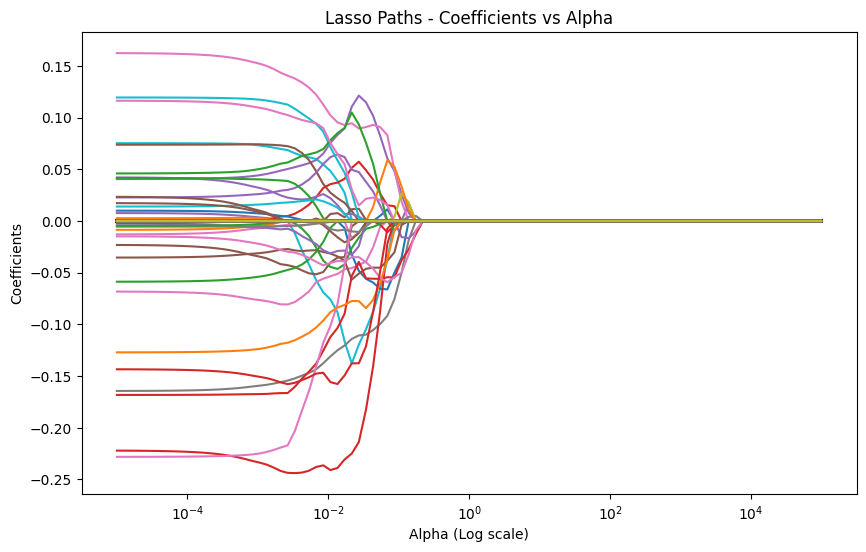

Lasso选择的特征：
14
['original_glszm_GrayLevelNonUniformityNormalized'
 'original_glszm_GrayLevelVariance'
 'log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis'
 'log-sigma-5-0-mm-3D_glcm_Imc1'
 'wavelet-LLH_glszm_SizeZoneNonUniformityNormalized'
 'wavelet-LLH_glszm_SmallAreaHighGrayLevelEmphasis'
 'wavelet-LHL_glszm_ZoneEntropy' 'wavelet-LHH_firstorder_Median'
 'wavelet-LHH_glrlm_GrayLevelNonUniformityNormalized'
 'wavelet-HLL_glcm_Imc2' 'wavelet-HLH_firstorder_Variance'
 'wavelet-HLH_glcm_Autocorrelation'
 'wavelet-HHH_glszm_HighGrayLevelZoneEmphasis'
 'wavelet-HHH_glszm_LowGrayLevelZoneEmphasis']
标准化后的特征数据（前5行）：
   original_glszm_GrayLevelNonUniformityNormalized  \
0                                         0.799471   
1                                        -0.712895   
2                                         0.203691   
3                                        -1.149220   
4                                        -1.383785   

   original_glszm_GrayLevelVariance  \
0            

,name,diagnostics_Mask-interpolated_Mean,diagnostics_Mask-interpolated_Minimum,diagnostics_Mask-interpolated_Maximum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,Radcore
0,TCGA-BA-4077,0.595544,-0.147310,0.627733,0.814284,0.969783,-0.305494,-0.988968,-0.969405,-0.809125,...,-0.477460,-0.858551,-0.364391,-0.601304,-0.636490,-0.355224,-0.439676,-0.424967,-0.382085,0.017702
1,TCGA-BB-7862,0.832330,0.312892,-0.134086,-0.550166,0.644473,0.582788,-0.132927,-0.064388,0.065921,...,-0.537814,-0.413500,0.403994,-0.695126,-0.690811,-0.322061,-0.632904,-0.523979,-0.338154,-0.027834
2,TCGA-BB-7863,1.145430,0.384065,1.472477,0.692090,1.772531,2.083339,0.222055,0.327734,0.515713,...,-0.465116,-0.037217,0.518457,-0.402734,0.104549,-0.509808,-0.273568,-0.366499,-0.549420,0.094361
3,TCGA-BB-7870,0.816226,0.436408,-0.440738,0.036188,-0.729336,0.236086,0.902772,1.249639,1.512810,...,-0.382600,-0.483333,0.091814,-0.547321,1.322872,-0.547925,0.060365,-0.118833,-0.591366,0.083858
4,TCGA-BB-7871,0.759520,0.295899,-0.045872,0.944242,-0.177806,1.001775,1.023282,1.920868,1.058945,...,-0.366004,-0.309718,0.292634,-0.515211,0.687784,-0.533380,-0.111692,-0.165063,-0.575115,0.107536
5,TCGA-BB-7872,-0.607428,-0.226476,-0.142472,0.441218,-0.640071,0.228727,0.758102,0.569680,0.448127,...,-0.243547,1.035301,0.777079,0.477639,1.353990,-0.545525,0.653397,0.577637,-0.590561,0.125749
6,TCGA-CN-4733,1.434962,1.182629,1.345741,0.036542,0.261678,-0.269471,-0.624176,-0.803891,-0.501957,...,-0.573803,0.536774,1.238934,-0.335846,-0.860297,-0.000892,-0.603475,-0.546801,0.030352,0.068606
7,TCGA-CN-4735,0.859769,0.344566,-0.001191,1.219586,-0.247187,0.215108,0.259626,0.947241,1.112950,...,-0.522577,-1.003288,-0.344897,-0.757891,-0.261061,-0.475384,-0.620524,-0.511044,-0.511438,0.038098
8,TCGA-CN-4742,-0.054924,0.018701,0.959900,1.054378,1.902079,0.973992,-0.512265,-0.335468,0.028587,...,-0.339395,-1.113791,-0.616164,-0.678698,1.133180,-0.543655,-0.015294,-0.077742,-0.586622,0.231563
9,TCGA-CN-5370,-0.228535,-1.484550,-0.291908,-1.387351,-0.790095,0.440129,1.282040,0.056390,0.430633,...,-0.241397,-0.000874,0.149605,-0.110632,0.769437,-0.532293,0.526464,0.463968,-0.574084,0.199091


In [ ]:
scaler = StandardScaler()
features_data_scaled = pd.DataFrame(scaler.fit_transform(features_data), columns=features_data.columns)

# 8.2 Lasso回归模型训练
lasso = LassoCV(cv=5, random_state=28, max_iter=10000, alphas=np.logspace(-4, -1, 100))
lasso.fit(features_data_scaled, survival_data[status_column])

# 8.3 获取最佳的alpha（正则化强度）值
best_alpha = lasso.alpha_

# 8.4 获取最佳的lambda值（在Lasso中通常指alpha的倒数）
best_lambda = best_alpha  # LassoCV中alpha就是lambda，lambda = 1/alpha

# 8.5 输出最佳的alpha和lambda
print(f"最佳alpha: {best_alpha}")
print(f"最佳lambda: {best_lambda}")

# 8.6 绘制 alpha 路径图，展示不同 alpha 下的系数变化
alphas_lasso, coefs_lasso, _ = lasso.path(features_data_scaled, survival_data[status_column], 
                                           alphas=np.logspace(-5, 5, 100))

# 绘制系数路径
plt.figure(figsize=(10, 6))
plt.plot(alphas_lasso, coefs_lasso.T)
plt.xscale('log')
plt.xlabel('Alpha (Log scale)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Coefficients vs Alpha')
plt.axis('tight')
plt.show()

# 8.7 提取非零系数的特征
selected_features_lasso = np.array(features_data.columns)[lasso.coef_ != 0]

# 输出Lasso选择的特征
print("Lasso选择的特征：")
print(len(selected_features_lasso))
print(selected_features_lasso)

# 8.8 计算 Rad-core（特征 * 系数的加权和）
lasso_coef_non_zero = lasso.coef_[lasso.coef_ != 0]  # 仅选择非零系数的权重
selected_features_lasso_non_zero = selected_features_lasso  # 选择对应非零系数的特征

# 计算 Rad-core（特征 * 系数的加权和）
features_data_selected = features_data_scaled[selected_features_lasso_non_zero]
print("标准化后的特征数据（前5行）：")
print(features_data_selected.head())  # 查看标准化后的特征数据

Radcore = features_data_selected.dot(lasso_coef_non_zero)  # 加权和

# ===== 重新添加 'name' 列 =====
name_column = Radiomics_features_new['name']  # 提取 'name' 列

# 将 Rad-core 添加到数据中
features_data_scaled['Radscore'] = Radcore
features_data_scaled.insert(0, 'name', name_column)
# 输出 Rad-core
print("Rad-core（前5个样本）：")
print(features_data_scaled[['Radcore']])
features_data_scaled.to_csv(r'G:\original_data\slected_feature.csv', index=False)
features_data_scaled


# 模型构建

## 逻辑回归模型

In [111]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 配置 matplotlib 使用中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体（SimHei）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


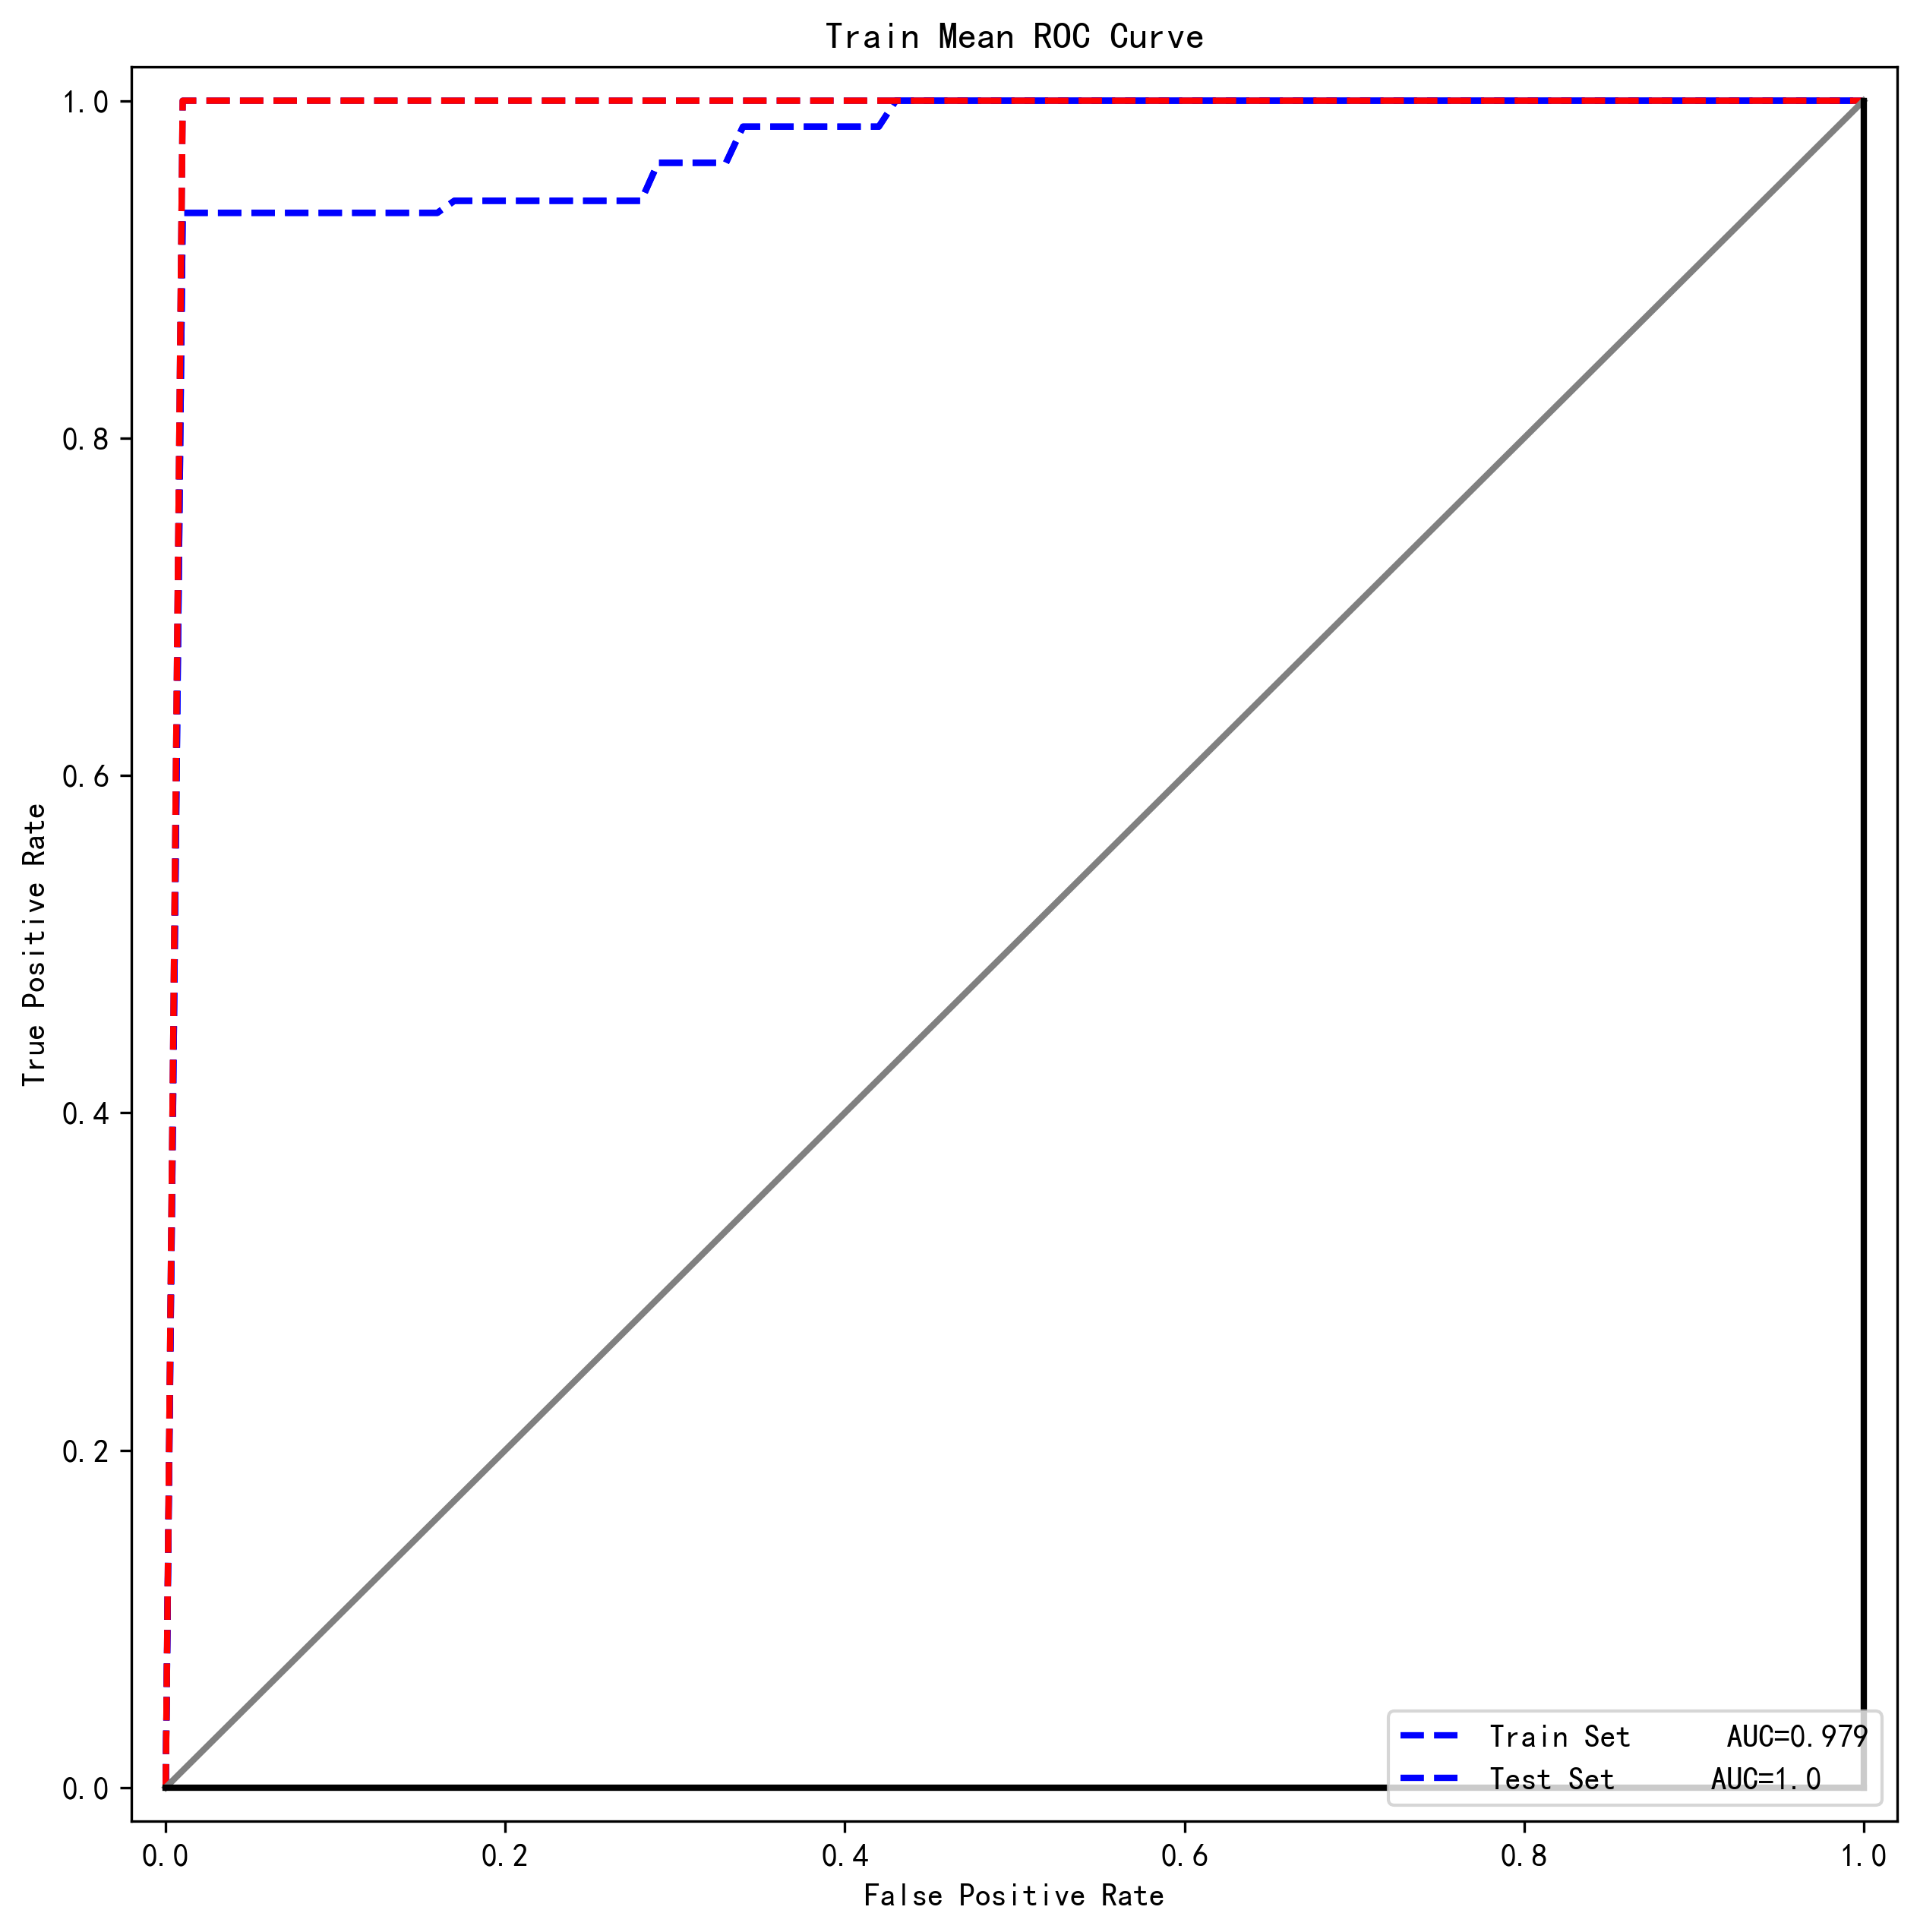

In [ ]:
# 读取数据
data = pd.read_csv(r"G:\original_data\Radiomics_features_clinical _radcore.csv")

# 设置随机种子
import random
random.seed(48)

# 设置交叉验证折叠数
num_folds = 10

train_size = 0.8  # 训练集占80%的比例
test_size = 0.2   # 测试集占20%的比例

# 存储每个折叠的ROC曲线和AUC

mean_tpr_rad = 0.0

mean_fpr = [i/100 for i in range(101)]
mean_fpr_tnm = [i/100 for i in range(101)]
# mean_fpr = [i/100 for i in range(101)]
# mean_fpr = [i/100 for i in range(101)]

mean_auc_rad = 0.0


train_mean_tpr_rad = 0.0
train_mean_fpr = [i/100 for i in range(101)]
train_mean_fpr_tnm = [i/100 for i in range(101)]
# train_mean_fpr = [i/100 for i in range(101)]
# train_mean_fpr = [i/100 for i in range(101)]
train_mean_auc_rad = 0.0
all_prob_train, all_true_train = [], []   # ← 如果只看测试集指标可不建
all_prob_test,  all_true_test  = [], []
# 使用 StratifiedKFold 进行交叉验证
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=28)

for train_indices, test_indices in skf.split(data, data["status"]):
#     trainData = data.loc[train_indices]
#     testData = data.loc[test_indices]
    num_train_samples = int(len(train_indices) * train_size)
    num_test_samples = len(train_indices) - num_train_samples
    custom_train_indices = train_indices[:num_train_samples]
    custom_test_indices = train_indices[num_train_samples:num_train_samples + num_test_samples]
    
    trainData = data.loc[custom_train_indices]
    testData = data.loc[test_indices]
    
    # 构建Logistic回归模型
    model_rad_10 = logit(formula="status ~ Radscore", data=trainData).fit_regularized(method='l1', alpha=1.0, disp=False)
    
    # 预测概率
#     Train
    rad_train_predictions = model_rad_10.predict(trainData)
#     Test
    rad_test_predictions = model_rad_10.predict(testData)
    
    # 计算测试集的ROC曲线
#     Train
    rad_roc_data_train = roc_curve(trainData["status"], rad_train_predictions)
    
    rad_train_pref = auc(rad_roc_data_train[0], rad_roc_data_train[1])

#     Test

    rad_roc_data_test = roc_curve(testData["status"], rad_test_predictions)
    
    rad_test_pref = auc(rad_roc_data_test[0], rad_roc_data_test[1])
    
    # 计算平均ROC曲线和AUC
#     Train
    train_mean_tpr_rad += np.interp(train_mean_fpr, rad_roc_data_train[0], rad_roc_data_train[1])
    train_mean_tpr_rad[0] = 0.0
    

    train_mean_auc_rad += rad_train_pref

#     Test

    mean_tpr_rad += np.interp(mean_fpr, rad_roc_data_test[0], rad_roc_data_test[1])


    mean_tpr_rad[0] = 0.0
    

    mean_auc_rad += rad_test_pref
    
    all_prob_test.extend(rad_test_predictions)
    all_true_test.extend(testData["status"])
    all_prob_train.extend(rad_train_predictions)
    all_true_train.extend(trainData["status"])
    all_prob_test.extend (rad_test_predictions)
    all_true_test.extend (testData["status"])


# 计算平均ROC曲线
# Train

train_mean_tpr_rad /= num_folds

train_mean_auc_rad /= num_folds
# Test

mean_tpr_rad /= num_folds


mean_auc_rad /= num_folds


# 绘制平均ROC曲线
plt.figure(figsize=(10, 10), dpi=300)

# Train Mean ROC Curve

plt.plot(train_mean_fpr, train_mean_tpr_rad, label=f"Train Set      AUC={round(train_mean_auc_rad, 3)}", color='blue',linestyle='--', lw=2)
plt.plot(mean_fpr, mean_tpr_rad, label=f"Test Set      AUC={round(mean_auc_rad, 3)}", color='blue',linestyle='--', lw=2)

plt.plot(train_mean_fpr, train_mean_tpr_rad, color='blue',linestyle='--', lw=2)
plt.plot(mean_fpr, mean_tpr_rad,  color='red',linestyle='--', lw=2)

combined_color = '#fff7f7'
fill_between(train_mean_fpr, 0, train_mean_tpr_rad_deep, color=combined_color, alpha=0.5)


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-')  # Add a diagonal dashed line for reference
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train Mean ROC Curve")
plt.legend(loc="lower right")
x = [1, 0]
y = [0, 0]
plt.plot(x, y, color='black', lw=2, linestyle='-')

a = [1, 1]  
b = [0, 1]
plt.plot(a, b, color='black', lw=2, linestyle='-')


# plt.savefig(r"F:\ROC\TrainROC1.tif", dpi=800)


=== 训练集指标 ===
AUC 0.932 | Acc 0.736 | Prec 0.718 | Rec 1.000 | F1 0.836

=== 测试集指标 ===
AUC 0.909 | Acc 0.655 | Prec 0.643 | Rec 1.000 | F1 0.783


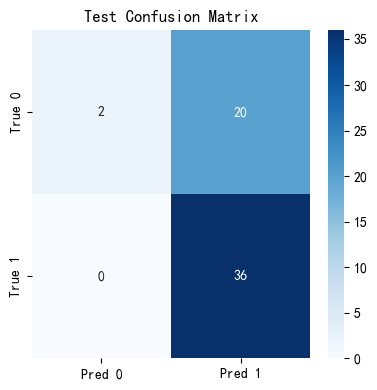

In [156]:
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             roc_curve, auc, confusion_matrix)
import seaborn as sns

# ==== 计算训练集与测试集阈值0.5的分类指标 ====
def binarize(p): return (np.array(p) >= 0.5).astype(int)

# 训练集
y_hat_tr = binarize(all_prob_train)
acc_tr  = accuracy_score (all_true_train, y_hat_tr)
prec_tr = precision_score(all_true_train, y_hat_tr, zero_division=0)
rec_tr  = recall_score   (all_true_train, y_hat_tr)
f1_tr   = f1_score       (all_true_train, y_hat_tr)
auc_tr  = auc(*roc_curve(all_true_train, all_prob_train)[:2])

# 测试集
y_hat_te = binarize(all_prob_test)
acc_te  = accuracy_score (all_true_test, y_hat_te)
prec_te = precision_score(all_true_test, y_hat_te, zero_division=0)
rec_te  = recall_score   (all_true_test, y_hat_te)
f1_te   = f1_score       (all_true_test, y_hat_te)
auc_te  = auc(*roc_curve(all_true_test, all_prob_test)[:2])

print("\n=== 训练集指标 ===")
print(f"AUC {auc_tr :.3f} | Acc {acc_tr :.3f} | Prec {prec_tr:.3f} | Rec {rec_tr:.3f} | F1 {f1_tr:.3f}")

print("\n=== 测试集指标 ===")
print(f"AUC {auc_te :.3f} | Acc {acc_te :.3f} | Prec {prec_te:.3f} | Rec {rec_te:.3f} | F1 {f1_te:.3f}")

# ==== 测试集混淆矩阵 ====
cm = confusion_matrix(all_true_test, y_hat_te)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['True 0','True 1'])
plt.title("Test Confusion Matrix")
plt.tight_layout(); plt.show()


# 模型评估

### AUC

### ROC

### 其他评估指标